In [1]:
%pylab inline
#from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

print("Tensorflow version:", tf.__version__)

img_height=128
img_width=416
val = '000400'
ckpt_file_1 = 'models/model-190532'
ckpt_file_2 = 'models/model-199432'
#fh = open('misc/sample.png', 'r')
I = pil.open('/home/nishad/cmsc_733/nkulkar2_p4/SfMLearner_modded/15/image_2/' + val +'.png')
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


2022-05-18 18:48:54.161869: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Tensorflow version: 1.15.5


/tmp/ipykernel_43089/2078362517.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  I = I.resize((img_width, img_height), pil.ANTIALIAS)


In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

In [3]:
saver_1 = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess1:
    saver_1.restore(sess1, ckpt_file_1)
    pred_1 = sfm.inference(I[None,:,:,:], sess1, mode='depth')

saver_2 = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess2:
    saver_2.restore(sess2, ckpt_file_2)
    pred_2 = sfm.inference(I[None,:,:,:], sess2, mode='depth')


2022-05-18 18:49:00.915708: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-18 18:49:00.989541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 18:49:00.989646: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1666] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3080 Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.545
pciBusID: 0000:01:00.0
2022-05-18 18:49:00.989660: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-18 18:49:00.992375: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-05-18 18:49:01.008806: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic

INFO:tensorflow:Restoring parameters from models/model-190532


2022-05-18 18:49:01.298318: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1206] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-05-18 18:49:01.298342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1212]      0 
2022-05-18 18:49:01.298347: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1225] 0:   N 
2022-05-18 18:49:01.298510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 18:49:01.298619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 18:49:01.298696: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1351] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 5316 MB memory) -> physical GPU (device: 0, name: NVIDIA GeFo

INFO:tensorflow:Restoring parameters from models/model-199432


2022-05-18 18:49:03.906778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 18:49:03.906878: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1666] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3080 Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.545
pciBusID: 0000:01:00.0
2022-05-18 18:49:03.906901: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-18 18:49:03.906920: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-05-18 18:49:03.906927: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-05-18 18:49:03.906932: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynami

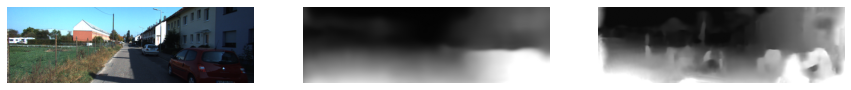

In [4]:
figure(figsize=(15,15))
tight_layout()
subplot(1,3,1); axis("off"); imshow(I)
subplot(1,3,2); axis("off"); imshow(normalize_depth_for_display(pred_1['depth'][0,:,:,0]))
subplot(1,3,3); axis("off"); imshow(normalize_depth_for_display(pred_2['depth'][0,:,:,0]))
savefig("Results/"+val+".png")